In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

# תרגול(2): הערכת מונטה–קרלו של π
שיטת מונטה־קרלו היא משפחה של שיטות חישוב המבוססות על דגימה אקראית מרובה במטרה להעריך כמויות מתמטיות או פיזיקליות שקשה לחשב ישירות. במקום לפתור בעיה מורכבת בצורה אנליטית (כמו אינטגרל מסובך בממד גבוה), נבצע הרבה ניסויים אקראיים מבוקרים, נחשב את התוצאה בכל ניסוי, ונשתמש בממוצע של התוצאות כדי להתקרב לפתרון האמיתי.  

נשתמש בשיטה לחישוב $\pi$: נזרוק באקראי ($N$) נקודות אחידות בריבוע $([-1,1] \times [-1,1])$.  
החלק היחסי של הנקודות שנמצאות בתוך מעגל היחידה $(x^2 + y^2 \le 1)$ שווה בקירוב לשטח המעגל חלקי שטח הריבוע.  
שטח המעגל הוא $(\pi \cdot 1^2 = \pi)$, ושטח הריבוע הוא $(2 \cdot 2 = 4)$. לכן:

$$
\frac{\#\{(x,y): x^2+y^2 \le 1\}}{N} \;\approx\; \frac{\pi}{4}
\quad\Rightarrow\quad
\hat{\pi} \;=\; 4 \cdot \frac{\#\{\text{points in circle}\}}{N} \;=\; 4\bar{I}.
$$

```{note}
הנוסחא מתקבלת מתוך החלק היחסי של הנקודות שנפלו בתוך המעגל (מתוך סך $N$ הנקודות). המספר הזה מוכפל ב־4 משום ששטח הריבוע כולו גדול פי 4 משטח רבע המעגל.
```

ככל שמגדילים את $(N)$, ההערכה משתפרת והשגיאה הטיפוסית קטנה בערך כמו $(1/\sqrt{N})$ (כלומר פי 10 יותר דגימות → בערך פי $(\sqrt{10})$ פחות שגיאה).

`````{admonition}  מדוע השגיאה קטנה בערך כמו $1/\sqrt{N}$?  
:class: tip
   * כל נקודה שנזרקת היא ניסוי בינארי (נפלה בתוך המעגל או לא).  
   * ההסתברות לנפילה בתוך המעגל היא $p \approx \pi/4$.  
   * ממוצע $N$ ניסויים בינארים מתכנס לערך האמיתי $p$, אבל יש לו סטיית תקן של בערך

     $$
     \sigma_{\bar{I}} = \sqrt{\frac{p(1-p)}{N}}.
     $$

   * מכיוון שההערכה שלנו ל־$\pi$ היא $\hat{\pi} = 4 \bar{I}$, גם סטיית התקן מוכפלת פי 4:

     $$
     \sigma_{\hat{\pi}} \approx \frac{c}{\sqrt{N}}, \quad c = 4 \sqrt{p(1-p)}.
     $$
     
   * לכן ככל שמספר הנקודות $N$ גדול יותר, השגיאה הטיפוסית קטנה כמו $1/\sqrt{N}$.
`````

הסימולציה הבאה ממחישה את העקרון על רבע מעגל. שימו לב: ככל שנדגמות יותר נקודות, ההערכה ל$\pi$ מדויקת יותר והשגיאה קטנה בהתאם.


![Alt text](https://upload.wikimedia.org/wikipedia/commons/d/d4/Pi_monte_carlo_all.gif)

### פונקציית הערכה ל־π
הפונקציה דוגמת $N$ נקודות אחידות בריבוע, בודקת כמה מהן בתוך המעגל, ומחזירה את $\hat{\pi}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Modern RNG for reproducibility
rng = np.random.default_rng(seed=123)

def mc_pi(N, seed=None):
    """
    Monte Carlo estimate of π via hit-or-miss in the unit disk.
    
    Parameters
    ----------
    N : int
        Number of random points to generate.
    seed : int, optional
        Random seed for reproducibility.
    
    Returns
    -------
    float
        Monte Carlo estimate of π.
    """
    # TODO:
    # 1. Initialize a random number generator with the given seed.
    # 2. Generate N random (x, y) points uniformly in [-1, 1] × [-1, 1].
    # 3. Determine which points fall inside the unit circle (x² + y² ≤ 1).
    # 4. Estimate π as 4 * (fraction of points inside the circle).

    # r = ...
    # xy = ...
    # inside = ...
    # return 


### כיצד משתנה הדיוק ביחס ל$N$?
נחשב את $\hat{\pi}$ עבור גדלים שונים של $N$, ונמדוד את השגיאה המוחלטת $|\hat{\pi} - \pi|$.


In [4]:
# TODO (1):
# Create an integer array `Ns` of sample sizes, logarithmically spaced from 1e2 to 1e6 (inclusive).
# Hint: use np.logspace(..., dtype=int).
# Example goal: [100, ..., 1_000_000]
# Ns = ...

# TODO (2):
# For each N in `Ns`, estimate π using mc_pi(N, seed=42) for reproducibility.
# Store the vector of estimates in `est` as a NumPy array (np.array([...])).
# est = ...

# TODO (3):
# Compute the absolute error for each estimate: |est - np.pi|
# Store the result in `abs_err`.
# abs_err = ...

try:
    # Explain and show the first few sample sizes
    print("Ns[:5]  → First five sample sizes (log-spaced from 1e2 to 1e6).",
          "These show how N grows on a logarithmic grid:", Ns[:5])

    # Explain and show the first few Monte Carlo estimates of π
    print("est[:3] → First three Monte Carlo estimates of π (using seed=42 for reproducibility).",
          "Each value is an approximation based on N random points:", est[:3])

    # Explain and show the first few absolute errors
    print("abs_err[:3] → First three absolute errors |est - π|.",
          "Each value is how far an estimate is from the true π:", abs_err[:3])

except NameError as e:
    # Figure out which variables are missing to guide the student
    missing = [name for name in ("Ns", "est", "abs_err") if name not in locals()]
    if missing:
        print("⚠️ Cannot print previews yet: the following variable(s) are undefined:",
              ", ".join(missing))
        print("💡 Complete the TODOs above in order:")
        print("    1) Define `Ns` with np.logspace(..., dtype=int)")
        print("    2) Compute `est` via mc_pi(N, seed=42) for each N in `Ns`")
        print("    3) Compute `abs_err` as np.abs(est - np.pi)")
    else:
        # Fallback if NameError wasn't due to the expected variables
        print("⚠️ NameError encountered:", e)


⚠️ Cannot print previews yet: the following variable(s) are undefined: Ns, est, abs_err
💡 Complete the TODOs above in order:
    1) Define `Ns` with np.logspace(..., dtype=int)
    2) Compute `est` via mc_pi(N, seed=42) for each N in `Ns`
    3) Compute `abs_err` as np.abs(est - np.pi)


### גרף 1: הערכה של $\pi$ כפונקציה של $N$

בגרף זה נציג את ההערכות $\hat{\pi}$ שמתקבלות מסימולציית מונטה–קרלו כפונקציה של מספר הדגימות $N$ (בסקאלה לוגריתמית), ונשווה אותן לערך האמיתי $\pi$ שמסומן בקו מקווקו.

כצפוי, עבור מספר קטן של דגימות $\hat{\pi}$ מתנדנד מאוד סביב הערך האמיתי. ככל ש־$N$ גדל, התוצאה מתייצבת ומתקרבת ל־$\pi$.

`````{admonition}  תחום אי־הוודאות התאורטי
:class: tip
נוכל לחשב בקירוב את סטיית התקן הצפויה:

- אם נסמן $p \approx \pi/4$, ההסתברות שנקודה אקראית תיפול בתוך המעגל.  
- ממוצע בינארי של $N$ ניסויים כאלה יש לו סטיית תקן:

  $$
  \sigma_{\bar{I}} = \sqrt{\frac{p(1-p)}{N}}.
  $$

- מאחר והערכתנו היא $\hat{\pi} = 4\bar{I}$, נקבל:

  $$
  \sigma_{\hat{\pi}} \approx \frac{c}{\sqrt{N}}, \quad c = 4\sqrt{p(1-p)} \approx 1.64.
  $$
  
`````

נשרטט סביב $\pi$ מרווח של $\pi \pm 2\sigma_{\hat{\pi}}$, שמייצג בקירוב רצועת ביטחון של 95%.  
אם רוב הנקודות $\hat{\pi}$ אכן נופלות בתוך הרצועה – סימן שההתנהגות של הסימולציה תואמת את התחזית התאורטית.

⚠️ Cannot plot yet: the following variable(s) are undefined: Ns, est, sigma
💡 Complete the TODOs above before running the plot.


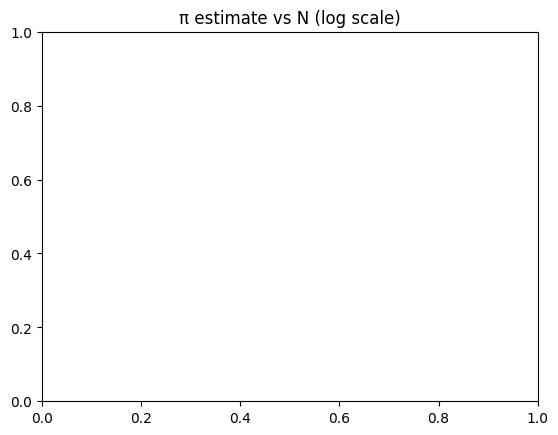

In [5]:
# Compute the theoretical standard deviation band for the Monte Carlo π estimator.

# TODO (1):
# Each point is a Bernoulli trial (inside or outside the circle).
# What is the probability of falling inside the circle?
# p = ...

# TODO (2):
# The standard deviation of the sample's mean scales as sqrt(p(1-p)/N).
# Don't forget to multiply by 4 to account for scaling in the π estimate!
# sigma = ...


# ----- Informative plot (do NOT edit) -----
try:
    plt.figure()
    plt.title("π estimate vs N (log scale)")

    # Plot the Monte Carlo estimates of π
    plt.plot(Ns, est, marker='o', label="estimate")

    # Draw the true value of π as a dashed line
    plt.axhline(np.pi, linestyle='--', label="π (true)")

    # Add a theoretical ~95% confidence band (±2σ) around true π
    plt.fill_between(Ns, np.pi - 2 * sigma, np.pi + 2 * sigma,
                     alpha=0.15, label="~95% band (theory)")

    plt.xscale('log')
    plt.xlabel("N")
    plt.ylabel("estimate")
    plt.legend()
    plt.show()

except NameError as e:
    missing = [name for name in ("Ns", "est", "sigma") if name not in locals()]
    if missing:
        print("⚠️ Cannot plot yet: the following variable(s) are undefined:",
              ", ".join(missing))
        print("💡 Complete the TODOs above before running the plot.")
    else:
        print("⚠️ NameError encountered:", e)


אנו רואים כי הגדלת מספר הדגימות $N$ גורמת להערכות $\hat{\pi}$ להיות קרובות יותר לערך האמיתי.

In [6]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "בדוגמת מונטה–קרלו להערכת π אנו זורקים N נקודות אחידות בריבוע [-1,1]×[-1,1].<br><br>מהי הנוסחה להערכת π מתוך הניסוי?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "π ≈ 4 * (מספר הנקודות בתוך המעגל / סך כל הנקודות)",
      "correct": true,
      "feedback": "נכון! שטח המעגל חלקי שטח הריבוע נותן את היחס, וכפול 4 משחזר את π"
    },
    {
      "answer": "π ≈ (מספר הנקודות מחוץ למעגל / סך כל הנקודות)",
      "correct": false,
      "feedback": "לא נכון — הנקודות שמחוץ למעגל אינן נותנות הערכה ישירה ל-π"
    },
    {
      "answer": "π ≈ (שטח הריבוע / שטח המעגל)",
      "correct": false,
      "feedback": "לא נכון — היחס הפוך: שטח המעגל חלקי שטח הריבוע קשור ל-π"
    },
    {
      "answer": "הערך תמיד שווה בדיוק ל-3.14 ללא תלות ב-N",
      "correct": false,
      "feedback": "לא נכון — ככל ש-N גדל ההערכה משתפרת, אבל היא לעולם אינה בדיוק 3.14"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### סיכום
* ההערכה $(\hat{\pi} = 4 \cdot \text{(ratio of points in circle)})$ מתכנסת לערך האמיתי ככל ש־$N$ גדל.
* השגיאה הטיפוסית קטנה בערך כמו $1/\sqrt{N}$: כדי לחצות את השגיאה בחצי צריך בערך פי 4 יותר דגימות.
* שימוש ב־`default_rng` עם `seed` קבוע מאפשר **שחזור** של אותן תוצאות בכל הפעלה.
